In [ ]:
'''
 * Copyright (c) 2005 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

# Adaptive Resonance Theory (ART)

In **Chapter 16** and **Chapter 18**, we learned about competitive networks and the **stability problem** in learning, particularly with networks that might not converge as more inputs are applied. In this chapter, we introduce **Adaptive Resonance Theory (ART)**, which is designed to overcome this stability issue.

## Objectives

The primary objective of ART is to address the **stability/plasticity dilemma**, a concept introduced by **Grossberg**, to allow the network to remain receptive to new patterns while retaining previously learned patterns.

## Theory and Examples

Competitive networks and the **Grossberg network** (from Chapter 18) can struggle with forming stable clusters. Grossberg's findings indicate:
- If the number of input patterns is limited or if clusters do not exceed available neurons in **Layer 2**, the network can stabilize.
- However, **arbitrary input patterns** can lead to instability, as recent learning can erode previous knowledge, a characteristic referred to as **plasticity**.

Grossberg termed this issue the **stability/plasticity dilemma**. Biological systems can manage stability and plasticity well, allowing them to identify familiar patterns even after prolonged absence or exposure to new patterns.

### Key Concepts in Adaptive Resonance Theory (ART)

- **Expectations**: ART uses "expectations" to address stability. When an input pattern is introduced, it is compared with the network's **prototype vector** that it closely matches. If the match isn't sufficient, a new prototype is selected, preserving previously learned prototypes.

### Overview of Adaptive Resonance

The **ART architecture** is derived from the **Grossberg network**. It introduces the following elements to stabilize learning:
- **L2 to L1 Expectations**: Prototypes for comparison.
- **Orienting Subsystem**: Governs response to novel inputs.
- **Gain Control**: Manages network responses.

Below is the basic architecture:

$$ \text{Layer 2} \rightarrow \text{Layer 1 Expectations} \rightarrow \text{Orienting Subsystem} \rightarrow \text{Gain Control} $$

In the following sections, we will explore each subsystem and examine **ART1** for binary input vectors, to understand the core mechanisms of **Adaptive Resonance Theory**.


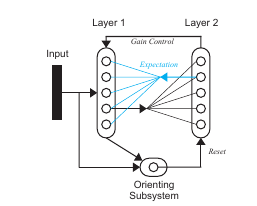

Figure.1 Basic ART Architecture


# ART1 Network - Layer 1 and L1-L2 Connections

In **Last Chapter**, we learned that the **L1-L2 connections** in the **Grossberg network** operate as **instars**, which facilitate clustering. This chapter expands upon these principles in the context of **Adaptive Resonance Theory (ART)**, specifically within the **ART1 network**.

## L1-L2 Connections in Grossberg Networks

The **L1-L2 connections** in the Grossberg network perform a clustering (or **categorization**) operation:
- When an input pattern is presented, it is **multiplied** by the **L1-L2 weight matrix** after normalization.
- **Competition** occurs in **Layer 2** to find the row of the weight matrix closest to the input vector.
- This **winning row** is moved toward the input vector, effectively forming clusters over repeated learning.

### Prototypes and Categories

After learning, each row in the **L1-L2 weight matrix** represents a **prototype pattern** corresponding to a cluster (or category) of input vectors.

## Feedback Connections in ART Networks

In ART networks, feedback connections from **Layer 2 to Layer 1** support pattern recall. These connections, termed **outstars** (see Chapter 15), help:
- **Reproduce a prototype pattern (expectation)** at Layer 1 when a node in Layer 2 is activated.
- Compare this expectation with the **input pattern** in Layer 1.

If the **input** and **expectation patterns** do not match, the **orienting subsystem** initiates a reset in Layer 2. This reset:
1. **Disables the current winning neuron** in Layer 2, removing the current expectation.
2. **Reinitiates competition** in Layer 2 with the previous winning neuron disabled.
3. **Projects a new expectation** from the newly winning neuron in Layer 2 to Layer 1.

This process continues until the **L2-L1 expectation** closely matches the **input pattern**.

## Detailed Structure of Layer 1 in ART1

In ART1, **Layer 1**:
- **Compares** the input pattern with the expectation pattern from Layer 2 (both are binary in ART1).
- **Resets** if the patterns do not match, via the orienting subsystem.

### Structure and Function of Layer 1

The ART1 **Layer 1** design is similar to the **Grossberg network's Layer 1**, but with key differences:
- **No normalization** is performed in Layer 1 of ART1, so there are no **on-center/off-surround connections** from the input vector.
- **Excitatory Input**: Consists of a combination of the input pattern and the **L1-L2 expectation**.
- **Inhibitory Input**: Originates from the **gain control signal** in Layer 2.

These inputs function together to compare and adjust patterns, ultimately forming a new **prototype pattern** if a close match is found.

### Mathematical Description of Layer 1

To further understand the operations, we will explore the differential equations governing the behavior of each subsystem. Subsequently, we will derive the **steady state responses** of these subsystems and summarize the overall operation of the **ART1 system**.

$$
\text{Input Pattern} \rightarrow \text{Layer 1} \rightarrow \text{Comparison with Expectation} \rightarrow \text{Orienting Subsystem (if mismatch)} \rightarrow \text{Reset Layer 2}
$$


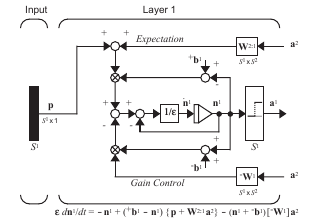
Figure.2 Layer 1 of the ART1 Network


# ART1 Network - Layer 1 Equations and Operation

**Figure.2** describes the operation of **Layer 1** in the **ART1 Network**. In this layer, the **excitatory** and **inhibitory inputs** work together to determine the output based on a **shunting model**. Here, we detail the mathematical equations governing this operation.

## Layer 1 Equation of Operation

The equation for the **Layer 1** operation is as follows:

$$
\frac{1}{\epsilon} \frac{dn(t)}{dt} = -n(t) + (b - n(t)) \{ p + W^{2:1} a(t) \} - (n(t) + b) \left[ W^{1} \right] a(t)
\tag{19.1}
$$

where:
- $ n(t) $ represents the neuron state in **Layer 1**.
- $ \epsilon $ is a small positive constant affecting the rate of response.
- $ b $ is a bias term that affects neuron activation.
- $ p $ is the **input pattern**.
- $ W^{2:1} $ is the **L2-L1 weight matrix** representing expectations from **Layer 2** to **Layer 1**.
- $ W^{1} $ is the **gain control** matrix from **Layer 2**.

### Layer 1 Output Calculation

The **output** of **Layer 1** is given by:

$$
a = \text{hardlim}(n)
\tag{19.2}
$$

where the **hard limit** function is defined as:

$$
\text{hardlim}(n) = 
\begin{cases} 
1, & n > 0 \\
0, & n \leq 0 
\end{cases}
\tag{19.3}
$$

### Excitatory Input in Layer 1

Equation (19.1) is a **shunting model** with an **excitatory input**:

$$
p + W^{2:1} a(t)
$$

This term combines the **input vector** $ p $ and the **L2-L1 expectation** $ W^{2:1} a(t) $. 

For example, if the **jth neuron in Layer 2** wins the competition (i.e., has output 1 while others are zero), then:

$$
W^{2:1} a = w^{2:1}_j
\tag{19.4}
$$

where $ w^{2:1}_j $ is the **jth column** of the matrix $ W^{2:1} $, trained using an **outstar rule**.

Thus, the **excitatory input** becomes:

$$
p + W^{2:1} a = p + w^{2:1}_j
\tag{19.5}
$$

Each column of the **L2-L1 matrix** represents a distinct **expectation** (or prototype pattern). In Layer 1, the input pattern and the expectation are combined using an **AND operation**.

### Inhibitory Input in Layer 1 (Gain Control)

The **inhibitory input** to Layer 1 is governed by the **gain control** term:

$$
\left[ W^{1} \right] a(t)
$$

where:

$$
W^{1} = 
\begin{bmatrix}
1 & 1 & \dots & 1 \\
1 & 1 & \dots & 1 \\
\vdots & \vdots & \ddots & \vdots \\
1 & 1 & \dots & 1 
\end{bmatrix}
\tag{19.6}
$$

This means that the **inhibitory input** to each neuron in Layer 1 is the **sum of all outputs** from **Layer 2**. Given that **Layer 2** uses a **winner-take-all** competition, only one neuron in Layer 2 will be active at a time, making the **gain control** input 1 when Layer 2 is active, and 0 when inactive.

The **gain control** term plays an important role in regulating Layer 1 activity, which will become clear as we analyze the **steady-state behavior** of Layer 1.



## Steady State Analysis of Neuron Response in Layer 1

The response of neuron $ i $ in **Layer 1** is described by the following differential equation:

$$
\frac{1}{\epsilon} \frac{dn_i}{dt} = -n_i + (b - n_i) \left\{ p_i + \sum_{j=1}^{S_2} w^{2:1}_{i,j} a_j \right\} - (n_i + b) \sum_{j=1}^{S_2} a_j
\tag{19.7}
$$

where:
- $ \epsilon \ll 1 $, meaning that the short-term memory traces (neuron outputs) change much faster than the long-term memory traces (weight matrices).

We aim to investigate the steady-state response for **two different cases**:

1. When **Layer 2 is inactive** (i.e., $ a_j = 0 $ for all $ j $).
2. When **Layer 2 is active**, with only one neuron in **Layer 2** having an output of 1, and all other neurons having an output of 0.

## Case 1: Layer 2 Inactive

When **Layer 2 is inactive** (i.e., each $ a_j = 0 $), Equation (19.7) simplifies to:

$$
\frac{1}{\epsilon} \frac{dn_i}{dt} = -n_i + (b - n_i) \{ p_i \}
\tag{19.8}
$$

In the **steady state** $ \left( \frac{dn_i}{dt} = 0 \right) $, we have:

$$
0 = -n_i + (b - n_i) p_i = - (1 + p_i) n_i + b p_i
\tag{19.9}
$$

Solving for the **steady-state neuron output** $ n_i $:

$$
n_i = \frac{b \, p_i}{1 + p_i}
\tag{19.10}
$$

Thus, for different values of $ p_i $:
- If $ p_i = 0 $, then $ n_i = 0 $.
- If $ p_i = 1 $, then $ n_i = \frac{b}{2} > 0 $.

Since we chose the **transfer function** for **Layer 1** to be the **hard limit (hardlim) function**, the output $ a $ of **Layer 1** becomes:

$$
a = p
\tag{19.11}
$$

Therefore, when **Layer 2 is inactive**, the output of **Layer 1** matches the **input pattern**.

## Case 2: Layer 2 Active

Now consider the case where **Layer 2 is active**. Assume that **neuron \( j \)** in **Layer 2** is the **winning neuron**. In this case:

- $ a_j = 1 $
- $ a_k = 0 $ for $ k \neq j $.

For this condition, Equation (19.7) simplifies to:

# Steady State Analysis of Layer 1 with Active and Inactive Layer 2

The differential equation describing the response of neuron $ i $ in **Layer 1** when **Layer 2** is active is given by:

$$
\frac{1}{\epsilon} \frac{dn_i}{dt} = -n_i + (b - n_i) \{ p_i + w^{2:1}_{i,j} \} - (n_i + b)
\tag{19.12}
$$

In the **steady state** $ \left( \frac{dn_i}{dt} = 0 \right) $, we have:

$$
0 = -n_i + (b - n_i) \{ p_i + w^{2:1}_{i,j} \} - (n_i + b)
\tag{19.13}
$$

Simplifying, we get:

$$
0 = - (1 + p_i + w^{2:1}_{i,j} + 1) n_i + b (p_i + w^{2:1}_{i,j}) - b
\tag{19.14}
$$

Solving for the steady-state output \( n_i \), we have:

$$
n_i = \frac{b (p_i + w^{2:1}_{i,j}) - b}{2 + p_i + w^{2:1}_{i,j}}
\tag{19.15}
$$

### Logical AND Operation in Layer 1

Layer 1 should combine the **input vector** with the **expectation from Layer 2** (represented by $ w^{2:1}_j $). Since we use binary patterns for both input and expectation, a **logical AND operation** is applied. This means that $ n_i $ should be:
- Less than zero when either $ p_i $ or $ w^{2:1}_{i,j} $ is zero.
- Greater than zero when both $ p_i $ and $ w^{2:1}_{i,j} $ are one.

Applying these conditions to Eq. (19.15), we derive the following:

$$
b(2) - b > 0
\tag{19.16}
$$

and

$$
b - b < 0
\tag{19.17}
$$

which leads to:

$$
b(2) > b > b
\tag{19.18}
$$

To satisfy these conditions, we could select values like \( b = 1 \) and \( b = 1.5 \).

Thus, when neuron $ j $ in Layer 2 is active, the output of Layer 1 is:

$$
a = p \cap w^{2:1}_j
\tag{19.19}
$$

where $ \cap $ represents the **logical AND operation**.

### Gain Control for AND Operation

The gain control term is necessary to implement the AND operation. Consider the numerator of Eq. (19.15):

$$
b(p_i + w^{2:1}_{i,j}) - b
\tag{19.20}
$$

Without the gain control term (here set as 1), Eq. (19.20) would represent an OR operation instead of an AND operation. Layer 1 requires the AND operation, as shown by the critical orienting subsystem discussed later.

### Summary of Layer 1 Operation

For **inactive Layer 2** (i.e., all $ a_j = 0 $):
$$
a = p
\tag{19.21}
$$

For **active Layer 2** (i.e., one $ a_j = 1 $):
$$
a = p \cap w^{2:1}_j
\tag{19.22}
$$

### Example Calculation with Network Parameters

Assuming the following network parameters:

$$
\epsilon = 0.1, \quad b = 1, \quad b = 1.5
\tag{19.23}
$$

with two neurons in Layer 2, two elements in the input vector, and the following weight matrix and input vector:

$$
W^{2:1} = \begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix} \quad \text{and} \quad p = \begin{bmatrix} 0 \\ 1 \end{bmatrix}
\tag{19.24}
$$

If neuron 2 in Layer 2 wins the competition (i.e., $ a_2 = 1 $), the operation equations for **Layer 1** are:

For $ n_1 $:

$$
\frac{1}{\epsilon} \frac{dn_1}{dt} = -n_1 + (1 - n_1) \{ p_1 + w^{2:1}_{1,2} \} - (n_1 + 1.5)
\tag{19.25}
$$

which simplifies to:

$$
\frac{1}{\epsilon} \frac{dn_1}{dt} = -3n_1 - 0.5
$$

For \( n_2 \):

$$
\frac{1}{\epsilon} \frac{dn_2}{dt} = -n_2 + (1 - n_2) \{ p_2 + w^{2:1}_{2,2} \} - (n_2 + 1.5)
\tag{19.26}
$$

which simplifies to:

$$
\frac{1}{\epsilon} \frac{dn_2}{dt} = -4n_2 + 0.5
$$

These equations can be further analyzed to demonstrate the behavior of **Layer 1** under different network conditions.



## Steady State Solutions of Layer 1

For **Layer 1**, the differential equations describing the responses of neurons $ n_1 $ and $ n_2 $ are:

$$
\frac{1}{\epsilon} \frac{dn_1}{dt} = -30n_1 - 5
\tag{19.26}
$$

$$
\frac{1}{\epsilon} \frac{dn_2}{dt} = -40n_2 + 5
\tag{19.27}
$$

In this simplified case, we can find closed-form solutions for these equations. Assuming both neurons start with **zero initial conditions**, the solutions are:

For \( n_1(t) \):

$$
n_1(t) = -\frac{1}{6} \left[ 1 - e^{-30t} \right]
\tag{19.28}
$$

For \( n_2(t) \):

$$
n_2(t) = \frac{1}{8} \left[ 1 - e^{-40t} \right]
\tag{19.29}
$$

### Figure.3: Response of Layer 1 Neurons

The responses $ n_1(t) $ and $ n_2(t) $ are plotted in Figure 19.3 below:

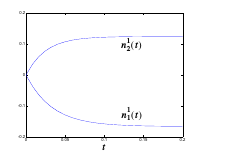

Figure.3 Response of Layer 1

- The plot shows that $ n_1(t) $ converges to a **negative value**.
- $ n_2(t) $ converges to a **positive value**.

As a result, the activations $ a_1(t) $ and $ a_2(t) $ converge as follows:
- $ a_1(t) \to 0 $
- $ a_2(t) \to 1 $

Since the transfer function for Layer 1 is the **hardlim function**, these results align with the steady-state analysis (Eq. (19.21)):

$$
a_1 = p \cap w^{2:1}_2 = 0 \cap 1 = 0
\tag{19.30}
$$

This response demonstrates the binary nature of the system under the influence of the hardlim function and confirms that neuron activations align with the network's logical AND expectations.




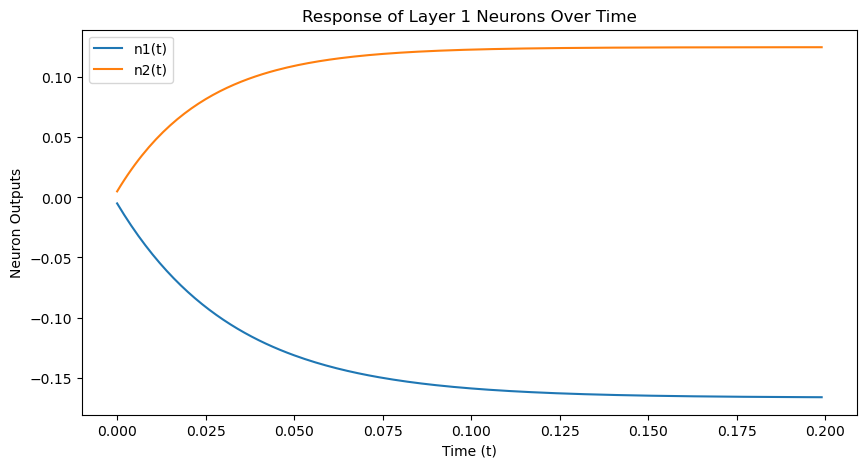

In [1]:
# Define constants and initial conditions
b_plus = 1
b_minus = 1.5
epsilon = 0.1
p1, p2 = 0, 1
w21 = 1  # Given in the weight matrix, W[2][1]

# Time step and total time
time_step = 0.001
total_time = 0.2
time_steps = int(total_time / time_step)

# Lists to store results for plotting
n1_values = []
n2_values = []
time_values = []

# Initialize values for n1 and n2
n1 = 0
n2 = 0

# Iterate over each time step to simulate the differential equations
for t in range(time_steps):
    current_time = t * time_step

    # Differential equation calculations for n1 and n2
    dn1_dt = -30 * n1 - 5
    dn2_dt = -40 * n2 + 5

    # Update n1 and n2 using Euler's method
    n1 += dn1_dt * time_step
    n2 += dn2_dt * time_step

    # Append the results for plotting
    n1_values.append(n1)
    n2_values.append(n2)
    time_values.append(current_time)

# Prepare data for plotting with Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn plot setup
plt.figure(figsize=(10, 5))
sns.lineplot(x=time_values, y=n1_values, label="n1(t)")
sns.lineplot(x=time_values, y=n2_values, label="n2(t)")
plt.xlabel("Time (t)")
plt.ylabel("Neuron Outputs")
plt.title("Response of Layer 1 Neurons Over Time")
plt.legend()
plt.show()
